Chapter 4

In [ ]:
%pip install ISLP

In [75]:
from ISLP import load_data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [2]:
weekly = load_data('Weekly')
weekly.columns

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [3]:
weekly.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [4]:
weekly.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [10]:
weekly.corr(numeric_only=True)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


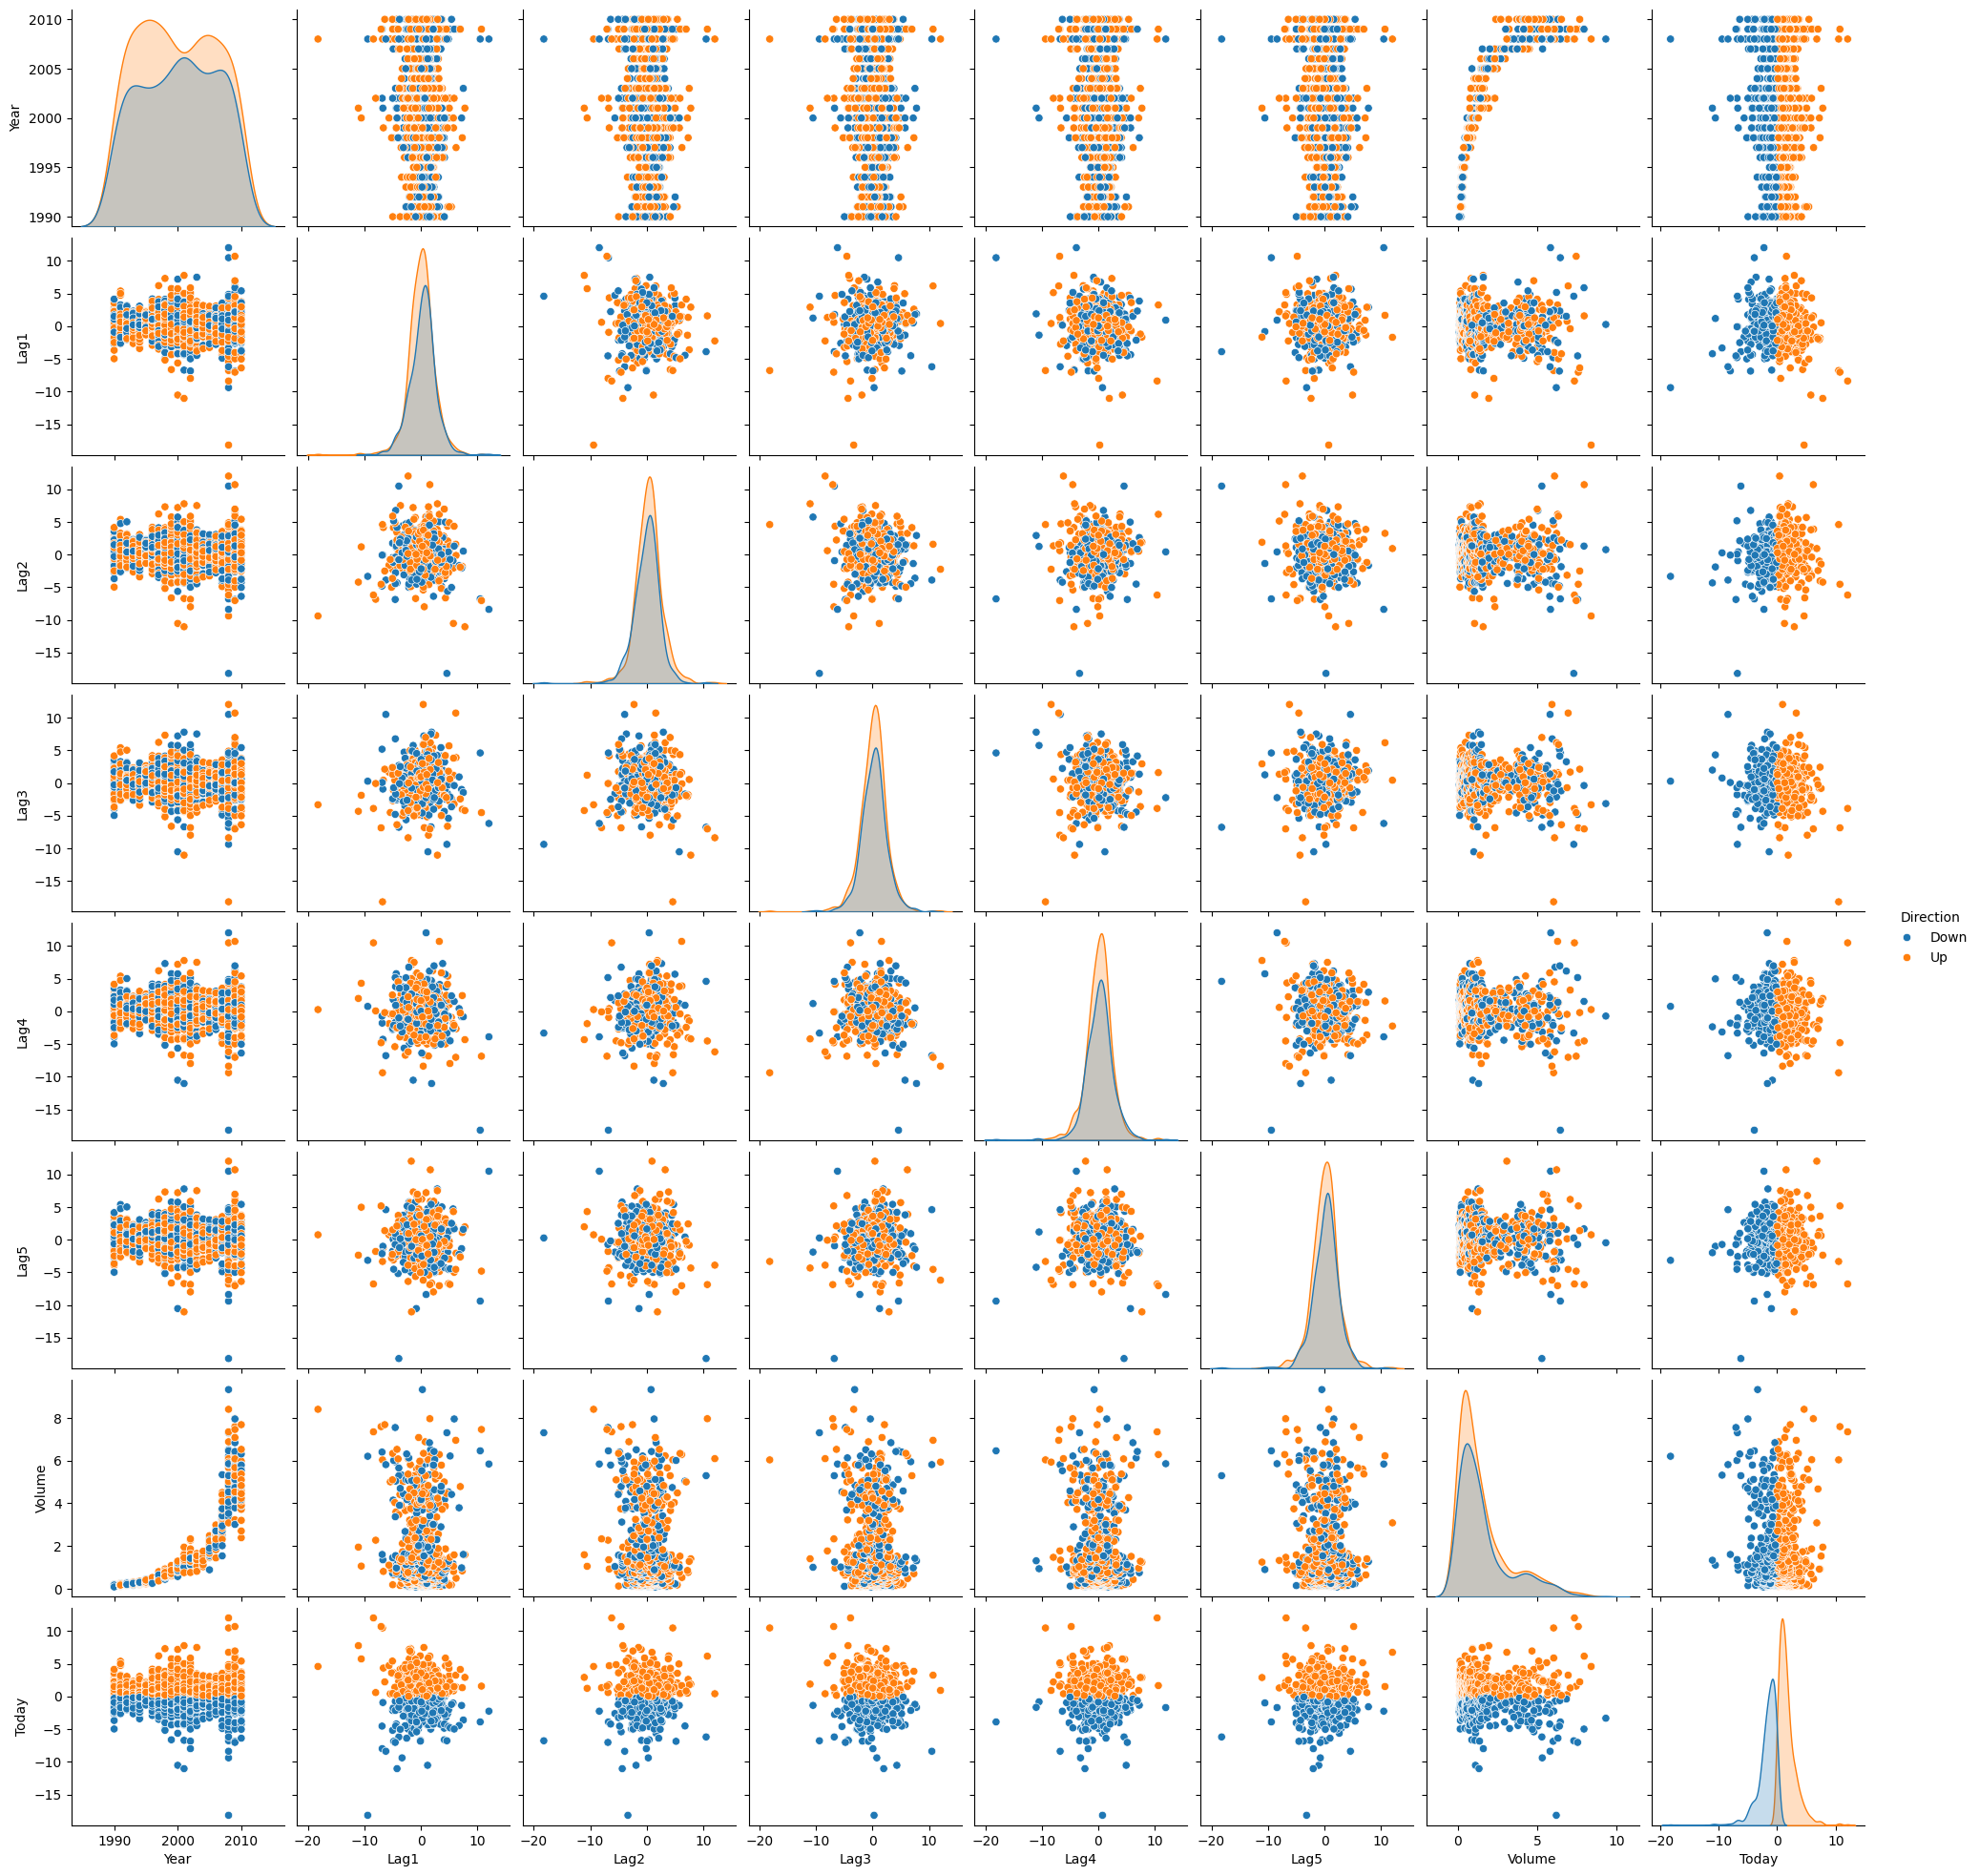

In [11]:
sns.pairplot(weekly, hue = "Direction")

In [13]:
endog = (weekly["Direction"] == "Up").astype("int64")
exog = sm.add_constant(weekly.drop(columns = ["Direction", "Year", "Today"]))
logit_mod = sm.Logit(endog, exog)
logit_res = logit_mod.fit()
logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Sun, 06 Jul 2025   Pseudo R-squ.:                0.006580
Time:                        22:11:33   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.026     -1.563      0.118      -0.093       0.010
Lag2           0.0584      0.027      2.175      0.030       0.006       0.111
Lag3          -0.0161      0.027     -0.602      0.547      -0.068       0.036
Lag4          -0.0278      0.026     -1.050      0.294      -0.080       0.024
Lag5          -0.0145      0.026     -0.549      0.583      -0.066       0.037
Volume        -0.0227      0.037     -0.616      0.538      -0.095       0.050
==============================================================================
"""

Lag2 seems to be msot influential/significant.

In [14]:
X = weekly.drop(columns = ["Direction", "Year", "Today"])
y = weekly["Direction"]

In [16]:
log_reg = LogisticRegression()
log_reg.fit(X, y)
params = np.concatenate((log_reg.intercept_, log_reg.coef_.flatten()))
pd.DataFrame(data = {"Coef. Est.":params}, index = X.columns.insert(0, "intercept"))

,Coef. Est.
intercept,0.266851
Lag1,-0.041234
Lag2,0.058392
Lag3,-0.016041
Lag4,-0.027779
Lag5,-0.014453
Volume,-0.022739


In [17]:
logit_probs = logit_res.predict()

In [18]:
log_reg_probs = log_reg.predict_proba(X)
pd.DataFrame(log_reg_probs, columns = log_reg.classes_).head(10)

,Down,Up
0,0.391425,0.608575
1,0.398988,0.601012
2,0.412462,0.587538
3,0.518290,0.481710
4,0.383146,0.616854
5,0.431574,0.568426
6,0.421419,0.578581
7,0.484757,0.515243
8,0.428493,0.571507
9,0.444558,0.555442


In [19]:
log_reg_pred = log_reg.predict(X)

In [22]:
pd.DataFrame(confusion_matrix(y, log_reg_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,54,430
ActualUp,48,557


In [23]:
weekly_period = weekly[weekly.Year.isin([1990, 2008])]

In [24]:
weekly_period.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [34]:
X_train = weekly_period.drop(columns = ["Direction", "Year", "Today","Lag1","Lag3","Lag4","Lag5"])
y_train = weekly_period["Direction"]
X_test = weekly[weekly.Year.isin([2009,2010])].drop(columns = ["Direction", "Year", "Today","Lag1","Lag3","Lag4","Lag5"])
y_test = weekly.loc[weekly.Year.isin([2009,2010]), "Direction"]

In [35]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [36]:
log_reg_pred = log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, log_reg_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,32,11
ActualUp,43,18


In [39]:
lda_clf = LinearDiscriminantAnalysis(store_covariance = True)
lda_clf.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

<Axes: xlabel='log-ratio score'>

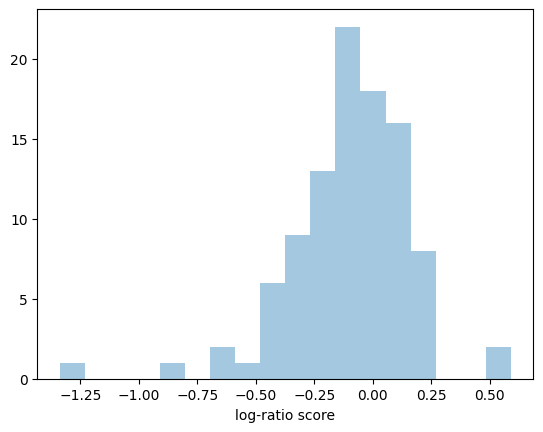

In [40]:
lda_scores = lda_clf.decision_function(X_train)
sns.distplot(lda_scores, kde = False, axlabel = "log-ratio score")

In [41]:
lda_pred = lda_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, lda_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,33,10
ActualUp,43,18


In [42]:
qda_clf = QuadraticDiscriminantAnalysis()
qda_clf.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

In [43]:
qda_pred = qda_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, qda_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,22,21
ActualUp,33,28


In [44]:
knn_1_clf = KNeighborsClassifier(n_neighbors = 1)
knn_1_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [45]:
knn_1_pred = knn_1_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, knn_1_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,29,14
ActualUp,32,29


In [46]:
knn_3_clf = KNeighborsClassifier(n_neighbors = 3)
knn_3_clf.fit(X_train, y_train)
knn_3_pred = knn_3_clf.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, knn_3_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,33,10
ActualUp,37,24


14.

In [47]:
auto = load_data("Auto")

In [48]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1


In [49]:
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [50]:
auto.loc[auto['mpg'] > auto['mpg'].median(),'mpg01'] = 1
auto.loc[auto['mpg'] < auto['mpg'].median(),'mpg01'] = 0

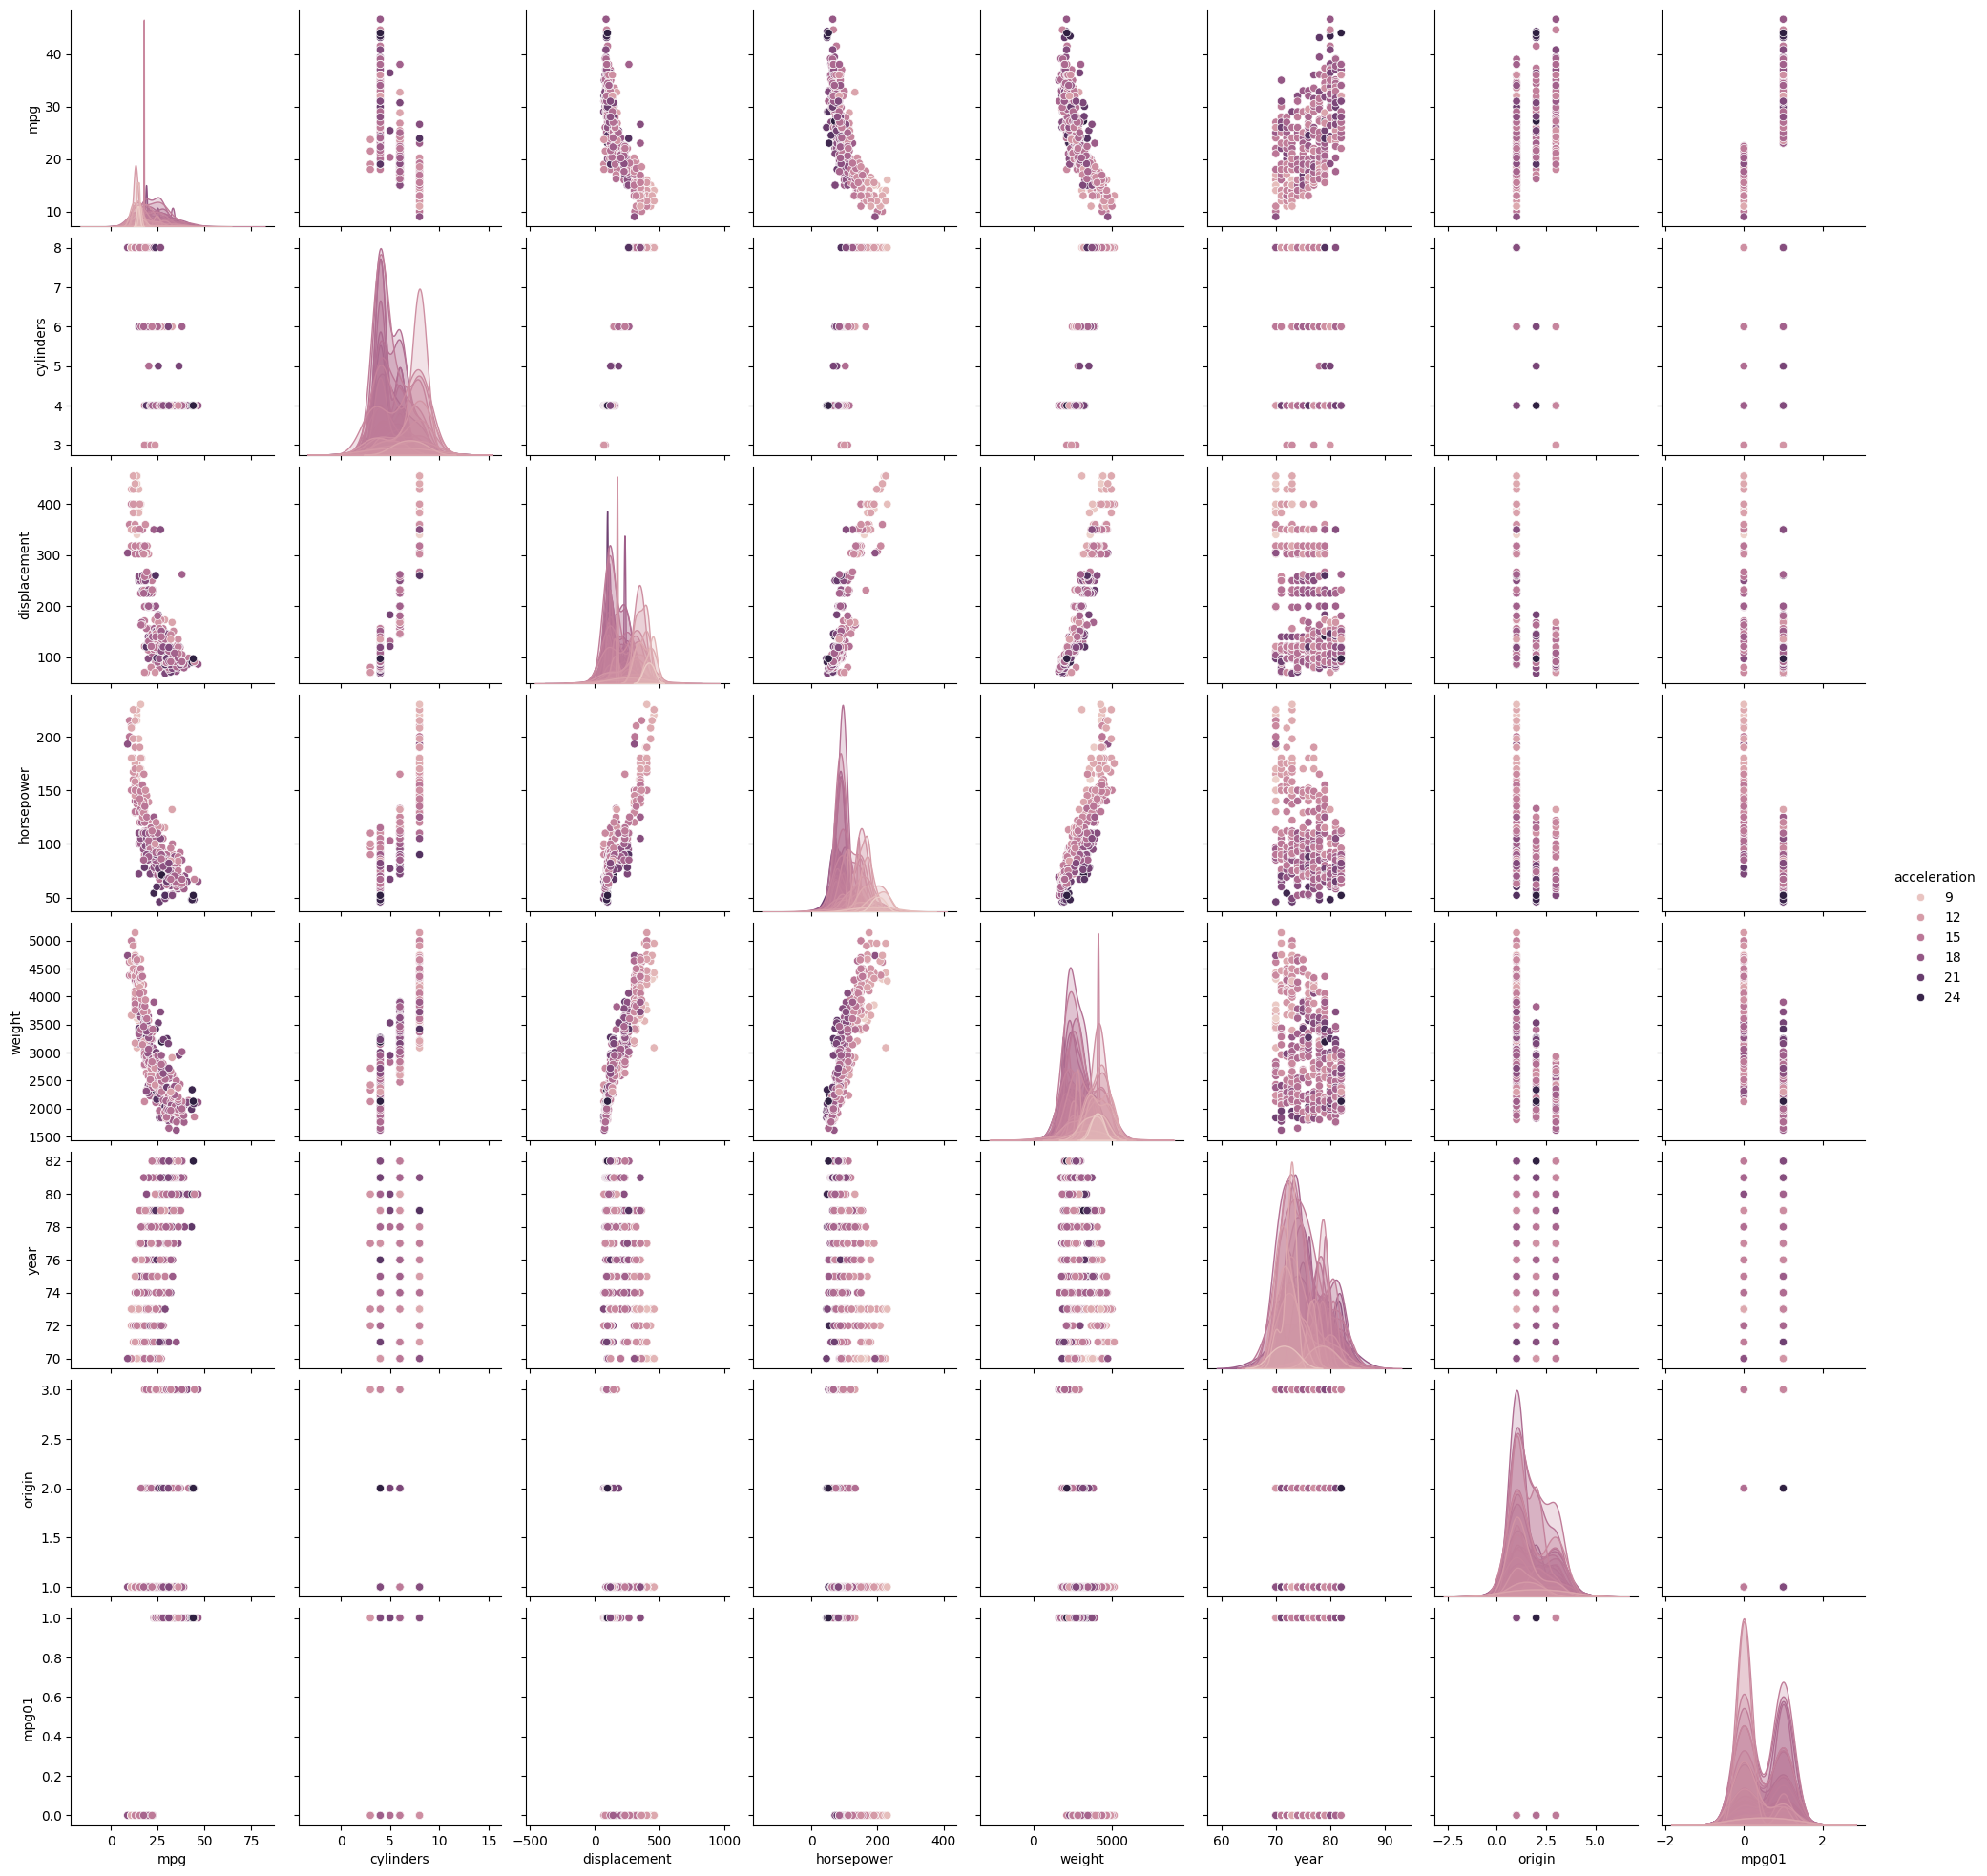

In [52]:
sns.pairplot(auto, hue = "acceleration")

In [55]:
scaler = StandardScaler(with_mean=True,
                        with_std=True,
                        copy=True)

In [56]:
scaler.fit(auto.drop(columns=['acceleration']))
X_std = scaler.transform(auto.drop(columns=['acceleration']))

In [57]:
feature_std = pd.DataFrame(
                 X_std,
                 columns=auto.drop(columns=['acceleration']).columns);
feature_std.std()

,0
mpg,1.001278
cylinders,1.001278
displacement,1.001278
horsepower,1.001278
weight,1.001278
year,1.001278
origin,1.001278
mpg01,1.001278


In [59]:
(X_train, X_test, y_train,y_test) = train_test_split(np.asarray(feature_std),
                            auto,
                            test_size=0.7,
                            random_state=0)

In [67]:
lda = LinearDiscriminantAnalysis(store_covariance = True)
lda_clf.fit(X_train, y_train['mpg01'].to_numpy())

LinearDiscriminantAnalysis(store_covariance=True)

<Axes: xlabel='log-ratio score'>

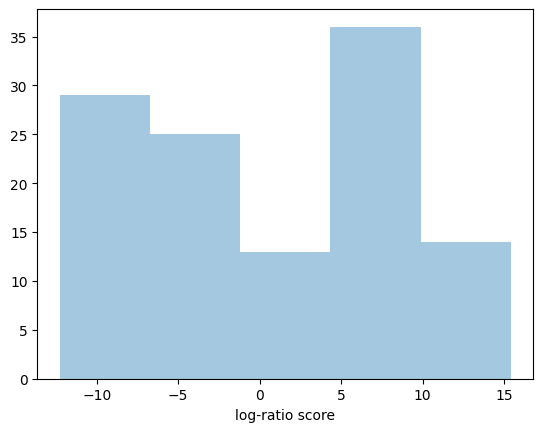

In [69]:
lda_scores = lda_clf.decision_function(X_train)
sns.distplot(lda_scores, kde = False, axlabel = "log-ratio score")

In [70]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train['mpg01'].to_numpy())

QuadraticDiscriminantAnalysis()

In [71]:
qda_pred = qda.predict(X_test)
pd.DataFrame(confusion_matrix(y_test['mpg01'].to_numpy(), qda_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,141,0
ActualUp,134,0


In [72]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train['mpg01'].to_numpy())

LogisticRegression()

In [73]:
log_reg_pred = log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test['mpg01'].to_numpy(), log_reg_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,141,0
ActualUp,0,134


In [76]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train['mpg01'].to_numpy())

GaussianNB()

In [77]:
naive_bayes_pred = naive_bayes.predict(X_test)
pd.DataFrame(confusion_matrix(y_test['mpg01'].to_numpy(), naive_bayes_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,141,0
ActualUp,0,134


In [78]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train['mpg01'].to_numpy())

KNeighborsClassifier(n_neighbors=1)

In [79]:
knn_pred = knn.predict(X_test)
pd.DataFrame(confusion_matrix(y_test['mpg01'].to_numpy(), knn_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,141,0
ActualUp,0,134


In [80]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train['mpg01'].to_numpy())

KNeighborsClassifier(n_neighbors=3)

In [81]:
knn_pred = knn.predict(X_test)
pd.DataFrame(confusion_matrix(y_test['mpg01'].to_numpy(), knn_pred),
             columns = ["PredDown", "PredUp"], index = ["ActualDown", "ActualUp"])

,PredDown,PredUp
ActualDown,141,0
ActualUp,0,134


16.

In [90]:
boston = load_data("Boston")

In [91]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [92]:
boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [94]:
boston.loc[boston['crim'] > boston['crim'].median(),'crim01'] = 1
boston.loc[boston['crim'] < boston['crim'].median(),'crim01'] = 0

In [95]:
X_train, X_test, y_train, y_test = train_test_split(boston.drop(columns = ["crim01"]),
                            boston["crim01"],
                            test_size=0.7,
                            random_state=0)

In [96]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [98]:
log_reg_pred = log_reg.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, log_reg_pred),
             columns = ["PredAbove", "PredBelow"], index = ["ActualAbove", "ActualBelow"])

,PredAbove,PredBelow
ActualAbove,162,12
ActualBelow,34,147


In [99]:
lda = LinearDiscriminantAnalysis(store_covariance = True)
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [100]:
lda_pred = lda.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, lda_pred),
             columns = ["PredAbove", "PredBelow"], index = ["ActualAbove", "ActualBelow"])

,PredAbove,PredBelow
ActualAbove,162,12
ActualBelow,45,136


In [101]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [102]:
naive_bayes_pred = naive_bayes.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, naive_bayes_pred),
             columns = ["PredAbove", "PredBelow"], index = ["ActualAbove", "ActualBelow"])

,PredAbove,PredBelow
ActualAbove,165,9
ActualBelow,17,164


In [103]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [104]:
knn_pred = knn.predict(X_test)
pd.DataFrame(confusion_matrix(y_test, knn_pred),
             columns = ["PredAbove", "PredBelow"], index = ["ActualAbove", "ActualBelow"])

,PredAbove,PredBelow
ActualAbove,160,14
ActualBelow,20,161
